In [ ]:
ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/flowers dataset

/content/drive/MyDrive/flowers dataset


In [ ]:
ls

Flowers-Dataset/


In [ ]:
pwd

'/content/drive/MyDrive/flowers dataset'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers dataset/Flowers-Dataset",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 3174 images belonging to 1 classes.


Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation='relu'))

In [ ]:
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

In [ ]:
len(x_train)

133

In [ ]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
133/133 [==============================] - 926s 7s/step - loss: 906.1675 - accuracy: 0.1525 - val_loss: 2927.3755 - val_accuracy: 0.0000e+00
Epoch 2/5
133/133 [==============================] - 50s 377ms/step - loss: 7053.3022 - accuracy: 0.2127 - val_loss: 12252.8994 - val_accuracy: 0.0000e+00
Epoch 3/5
133/133 [==============================] - 48s 362ms/step - loss: 24186.1348 - accuracy: 0.1953 - val_loss: 25751.0488 - val_accuracy: 0.0000e+00
Epoch 4/5
133/133 [==============================] - 49s 365ms/step - loss: 49849.6602 - accuracy: 0.2038 - val_loss: 43352.0664 - val_accuracy: 1.0000
Epoch 5/5
133/133 [==============================] - 50s 379ms/step - loss: 97967.2656 - accuracy: 0.2042 - val_loss: 106847.7969 - val_accuracy: 0.0000e+00


In [ ]:
model.save("flowers.h5")

#testing of the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("/content/drive/MyDrive/flowers dataset/flowers.h5")

In [ ]:
img=image.load_img("/content/drive/MyDrive/flowers dataset/Flowers-Dataset/flowers/rose/174109630_3c544b8a2f.jpg",target_size=(64,64))

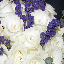

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[ 38.,  38.,  64.],
        [ 44.,  47.,  28.],
        [ 81.,  72.,  93.],
        ...,
        [ 19.,  24.,  30.],
        [ 19.,  24.,  30.],
        [ 18.,  21.,  28.]],

       [[ 31.,  34.,  39.],
        [178., 165., 174.],
        [198., 192., 192.],
        ...,
        [ 17.,  22.,  28.],
        [ 20.,  25.,  31.],
        [ 17.,  20.,  27.]],

       [[205., 204., 209.],
        [222., 212., 210.],
        [199., 187., 187.],
        ...,
        [ 21.,  26.,  32.],
        [ 15.,  20.,  26.],
        [ 18.,  21.,  26.]],

       ...,

       [[233., 234., 229.],
        [235., 236., 231.],
        [238., 239., 234.],
        ...,
        [121., 113., 102.],
        [165., 165., 155.],
        [148., 162., 139.]],

       [[234., 235., 230.],
        [235., 236., 231.],
        [237., 238., 233.],
        ...,
        [187., 193., 179.],
        [153., 156., 139.],
        [118., 144., 157.]],

       [[228., 229., 223.],
        [231., 232., 226.],
        [232., 2

In [ ]:
x.ndim

3

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x.ndim

4

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 104ms/step


In [ ]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
labels = ["daisy","dandelion","rose","sunflower","tulip"]

In [ ]:
np.argmax(pred)

2

In [ ]:
labels[np.argmax(pred)]

'rose'